['11000111', '11100001', '11010010', '01101001', '00000101', '11011101', '01101100', '00100111', '11000010', '00100000', '01011111', '11101100', '01101101', '10011010', '00101000', '11001100', '10101100', '11001011', '11010111', '00011110', '01111011', '00000101', '10110001', '11000101', '10110010', '00001101', '00011000', '10001100', '11010010', '10111010', '01110001', '00111101', '10110110', '00100110', '10111000', '10111111', '01110100', '01000011', '11010011', '11010001', '01001110', '10010111', '01100110', '10110010', '01000100', '10101000', '11001010', '10100110', '00011111', '01100011', '11110101', '00110001', '11110111', '10101111', '00100000', '11010011', '00111100', '00110110', '01011010', '01001110', '10000001', '00011010', '11111011', '01011110', '01100111', '11001000', '10101001', '00101010', '00101000', '11111000', '01001111', '11101111', '00100110', '11100000', '10011000', '10110001', '10000001', '10010001', '11100011', '01101011', '10011000', '00000001', '01110010', '01

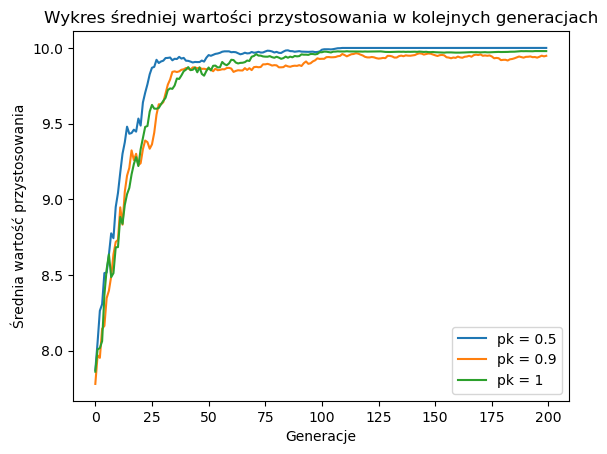

In [1]:
#ZAD1
import math
import matplotlib.pyplot as plt
import random
def generate_genom(length):
    pull = ['0','1']
    genom = ""
    for _ in range(length): genom += random.choice(pull)
    return genom

def generate_population(size,genom_length):
    return [generate_genom(genom_length) for _ in range(size)]

def genom_value(genom):
    x = int(genom, 2)
    if x>=0 and x<=255: return 0.2 * (x ** 0.5) + 2 * math.sin(x * 0.02 * math.pi) + 5

def population_values(population):
    return [genom_value(genom) for genom in population]

def pair_selection(population):
    return random.choices(population=population,weights = [genom_value(genom) for genom in population],k=2)

def pair_crossing(genom1,genom2):
    length = len(genom1)
    x = random.randint(1,length-1)
    return genom1[0:x] + genom2[x:], genom2[0:x] + genom1[x:]

def mutation(population,num):
    for _ in range(num):
        g = random.randrange(len(population))
        genom = population[g]
        index = random.randrange(len(genom))
        if genom[index] == '0': genom = genom[0:index] + '1' + genom[index + 1:]
        else: genom = genom[0:index] + '0' + genom[index+1:]
        population[g] = genom
    return population

def run_evolution(population,number_of_generations,pk,pm):
    avg_result = []
    best_result = []
    for _ in range(number_of_generations):
        nex_gen = []
        while(len(nex_gen)!=len(population)):
            if random.random() < pk:
                gen1,gen2 = pair_selection(population)
                gen1,gen2 = pair_crossing(gen1,gen2)
                nex_gen.append(gen1)
                nex_gen.append(gen2)
        if random.random() < pm: mutation(population,1)
        avg_result.append(sum(population_values(nex_gen)) / len(nex_gen))
        best_result.append(max(genom_value(genom) for genom in population))
        population = nex_gen
    return avg_result,best_result


pop = generate_population(200,8)
print(pop)
avg1,max1 =run_evolution(pop,200,0.5,0.1)
avg2,max2 =run_evolution(pop,200,0.9,0.1)
avg3,max3 =run_evolution(pop,200,1,0.1)

res = [a for a in range(len(avg1))]
plt.plot(res,avg1,label = 'pk = 0.5')
plt.plot(res,avg2,label = 'pk = 0.9')
plt.plot(res,avg3,label = 'pk = 1')
plt.xlabel('Generacje')
plt.ylabel('Średnia wartość przystosowania')
plt.title('Wykres średniej wartości przystosowania w kolejnych generacjach')
plt.legend()
plt.show()



['0011110011010101', '1101110011000110', '1001010010000111', '0011100111011011', '1010100100111100', '0111111011001110', '0111011111000100', '1001011001111101', '0001010011110100', '0010111100001000', '0100110010000001', '1110011001000110', '1010011011101111', '0011101111101101', '0111001010100001', '1001111100100011', '1010100110010100', '1010001010100101', '0100100000010111', '1000001100111111', '0110110011011110', '0000111100101110', '0011100010001010', '1111011110011111', '1101100011001001', '1010111111110000', '1011000001011000', '0110110000001110', '0011100100111100', '0100011000010010', '1010011010100110', '0110100100110001', '1111010011010010', '1111011010110001', '0001111001011111', '1100010001111110', '1100100100011001', '0100110101111110', '0111110100110101', '1000111110011101', '0010011110001110', '0010100111000001', '0101010010000111', '1111011111001101', '1100011100101000', '1111001000111001', '1101010110000110', '1101011111010101', '0101110110101010', '1111101111000001',

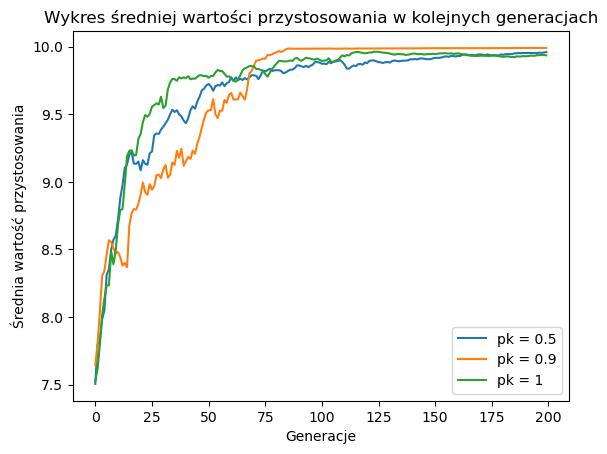

In [3]:
#ZAD2
import math
import matplotlib.pyplot as plt
import random
def generate_genom(length):
    pull = ['0','1']
    genom = ""
    for _ in range(length): genom += random.choice(pull)
    return genom

def generate_population(size,genom_length):
    return [generate_genom(genom_length) for _ in range(size)]

def gen_to_float(gen):
    i=gen[:len(gen)//2]
    f=gen[len(gen)//2:]
    i=int(i,2)
    fl=0
    for a in range(len(f)):
        fl+=int(f[a])*2**(-a-1)
    return i+fl
    
def genom_float_value(genom):
    x = gen_to_float(genom)
    # if x>=0 and x<=255:
    return 0.2 * (x ** 0.5) + 2 * math.sin(x * 0.02 * math.pi) + 5

def population_float_values(population):
    return [genom_float_value(genom) for genom in population]

def pair_selection_float(population):
    return random.choices(population=population,weights = [genom_float_value(genom) for genom in population],k=2)

def pair_crossing(genom1,genom2):
    length = len(genom1)
    x = random.randint(1,length-1)
    return genom1[0:x] + genom2[x:], genom2[0:x] + genom1[x:]

def mutation(population,num):
    for _ in range(num):
        g = random.randrange(len(population))
        genom = population[g]
        index = random.randrange(len(genom))
        if genom[index] == '0': genom = genom[0:index] + '1' + genom[index + 1:]
        else: genom = genom[0:index] + '0' + genom[index+1:]
        population[g] = genom
    return population

def run_evolution_float(population,number_of_generations,pk,pm):
    avg_result = []
    best_result = []
    for _ in range(number_of_generations):
        nex_gen = []
        while(len(nex_gen)!=len(population)):
            if random.random() < pk:
                gen1,gen2 = pair_selection_float(population)
                gen1,gen2 = pair_crossing(gen1,gen2)
                nex_gen.append(gen1)
                nex_gen.append(gen2)
        if random.random() < pm: mutation(population,1)
        avg_result.append(sum(population_float_values(nex_gen)) / len(nex_gen))
        best_result.append(max(genom_float_value(genom) for genom in population))
        population = nex_gen
    return avg_result,best_result

pop = generate_population(200,16)
print(pop)
avg1,max1 =run_evolution_float(pop,200,0.5,0.1)
avg2,max2 =run_evolution_float(pop,200,0.9,0.1)
avg3,max3 =run_evolution_float(pop,200,1,0.1)

res = [a for a in range(len(avg1))]
plt.plot(res,avg1,label = 'pk = 0.5')
plt.plot(res,avg2,label = 'pk = 0.9')
plt.plot(res,avg3,label = 'pk = 1')
plt.xlabel('Generacje')
plt.ylabel('Średnia wartość przystosowania')
plt.title('Wykres średniej wartości przystosowania w kolejnych generacjach')
plt.legend()
plt.show()

